In [1]:
import sys
import os
sys.path.append(os.path.abspath("..")) 

In [2]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy import Column, Integer, String, DateTime, func
from sqlalchemy.orm import declarative_base
from sqlalchemy import inspect
from sqlalchemy import text
from database import engine

from database import Base, SessionLocal, engine, ensure_views_from_files, init_db
from main.sql import load_dict, count_overlap_word

In [4]:
init_db()
ensure_views_from_files()

with engine.begin() as conn:
    conn.execute(text("DROP TABLE IF EXISTS TranslationLog"))

## Downloading Quiz Score

In [5]:
df = load_dict()

In [ ]:
df.head()

,Word Id,Word,Pinyin,Pinyin Simplified,Meaning,Added Date,Word Category,Word Rarity,Type,Sentence,Sentence Pinyin,Sentence Meaning,Quiz Attempts,Num Pinyin Correct,Num Meaning Correct,Last Quiz
2314,D003162,作曲家,zuòqǔjiā,zuo4qu3jia1,Composer,2026-01-24 00:00:00.000000,Music,Common,Noun,他是一位著名的作曲家。,Tā shì yī wèi zhùmíng de zuòqǔjiā.,He is a famous composer.,0,0,0,None
2315,D003163,感恩,gǎn ēn,gan3 en1,To feel and show gratitude; to be thankful.,2026-01-24 00:00:00.000000,Emotion,Common,Verb,我们应该学会感恩每一个帮助过我们的人。,Wǒmen yīnggāi xuéhuì gǎn'ēn měi yīgè bāngzhù g...,We should learn to be thankful to everyone who...,0,0,0,None
2316,D003164,有趣,yǒu qù,you3 qu4,Interesting; something that arouses curiosity ...,2026-01-24 00:00:00.000000,Description,Common,Adjective,这个故事非常有趣，我看得停不下来。,"Zhège gùshì fēicháng yǒuqù, wǒ kàn de tíng bù ...","This story is very interesting, I can't stop r...",0,0,0,None
2317,D003166,珍惜,zhēn xī,zhen1 xi1,To value and appreciate something or someone d...,2026-01-24 00:00:00.000000,Emotion,Common,Verb,我们应该珍惜每一个与家人共度的时光。,Wǒmen yīnggāi zhēnxī měi yīgè yǔ jiārén gòngdù...,We should cherish every moment spent with family.,0,0,0,None
2318,D003167,开怀大笑,kāi huái dà xiào,kai1 huai2 da4 xiao4,"To laugh heartily and openly, often with a sen...",2026-01-24 00:00:00.000000,Idiom,Rare,Verb,听到那个笑话后，大家都开怀大笑。,"Tīngdào nàgè xiàohuà hòu, dàjiā dōu kāihuái dà...","After hearing the joke, everyone laughed heart...",0,0,0,None


In [8]:
df['Num Pinyin Wrong'] = (df['Num Pinyin Correct']!='').astype(int)
df['Num Meaning Wrong'] = (df['Num Meaning Correct']!='').astype(int)
df['Last Quiz'] = pd.to_datetime(df['Last Quiz'])

ValueError: time data "2025-08-31" doesn't match format "%Y-%m-%d %H:%M:%S.%f", at position 5. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
score_summary_word = quiz_history.groupby('Word')[['Right Score', 'Wrong Score', 'Pinyin Wrong', 'Meaning Wrong']].sum().reset_index()
top_10_pinyin_wrong = score_summary_word.loc[score_summary_word['Pinyin Wrong']>1].sort_values(by='Pinyin Wrong', ascending=False)['Word'].to_list()[:10]
top_10_meaning_wrong = score_summary_word.loc[score_summary_word['Meaning Wrong']>1].sort_values(by='Meaning Wrong', ascending=False)['Word'].to_list()[:10]

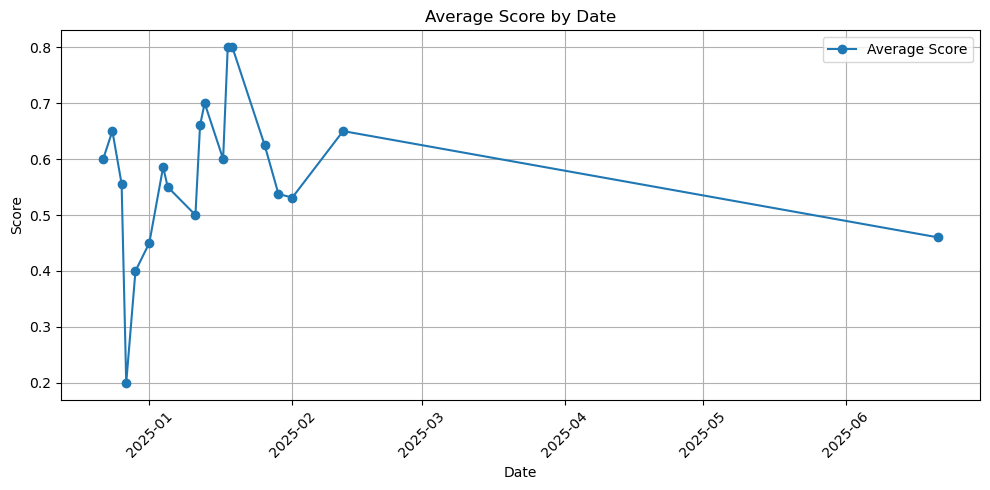

: 

In [ ]:
score_summary_date = quiz_history.groupby('Last Quiz')[['Right Score']].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(score_summary_date['Last Quiz'], score_summary_date['Right Score'], marker='o', linestyle='-', label='Average Score')
plt.title('Average Score by Date')
plt.xlabel('Date')
plt.ylabel('Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()
